<a href="https://colab.research.google.com/github/seiya0022/tensorflow-deep-learning/blob/main/my_practice_notebooks/01_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Networks in Tensorflow

Thre are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
print(tf.__version__)

2.18.0


In [ ]:
# create features
X = np.array([-13., -10., -7., -4., -1., 2., 5., 8., 11., 14.])
X.shape

(10,)

In [ ]:
# Create labels
y = np.array([3., 6., 9., 12., 15., 18., 21., 24., 27., 30.])
y.shape

(10,)

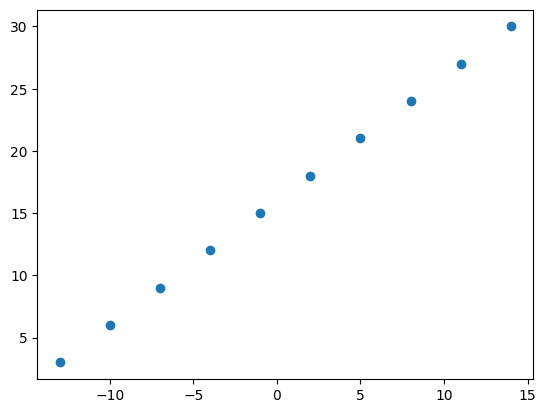

In [ ]:
plt.scatter(X, y)

## Input and output shapes

In [ ]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
input_shape = X[1].shape
output_shape = y[1].shape
input_shape, output_shape

((), ())

In [ ]:
X[0], y[0]

(-13.0, 3.0)

In [ ]:
X[1], y[1]

(-10.0, 6.0)

In [ ]:
# Turn Numpy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(10,), dtype=float64, numpy=array([-13., -10.,  -7.,  -4.,  -1.,   2.,   5.,   8.,  11.,  14.])>,
 <tf.Tensor: shape=(10,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24., 27., 30.])>)

In [ ]:
input_shape = X[1].shape
output_shape = y[1].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

## Steps in modelling with TensorFlow

1. **Creating a model** - difine the input and output layers, as well as the hidden layers of a deep learning models.
2. **Compiling a model** - define the loss function(in other words, the function wich tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X & y (features and labels).

In [ ]:
# set random seed
tf.random.set_seed(42)

# 1. create a model using the Sequential API
model = tf.keras.Sequential([tf.keras.layers.Dense(1)
])

#2. Compile the model f
model.compile(loss = tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer = tf.keras.optimizers.SGD(),   #SGD is short for stochastic gradient descent
              metrics = ['mae']
              )

#3. Fit the model
model.fit(tf.expand_dims(X, -1), y, epochs = 5)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 518ms/step - loss: 16.0076 - mae: 16.0076
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 15.9951 - mae: 15.9951
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 15.9826 - mae: 15.9826
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 15.9701 - mae: 15.9701
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 15.9576 - mae: 15.9576


In [ ]:
X1 = tf.expand_dims(X, 0)
X1

<tf.Tensor: shape=(1, 10), dtype=float64, numpy=array([[-13., -10.,  -7.,  -4.,  -1.,   2.,   5.,   8.,  11.,  14.]])>

In [ ]:
# Try and make a prediction using our model
y_pred = model.predict(tf.constant([[17]]))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


array([[18.842733]], dtype=float32)

## Improving this model
We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data(give the model more examples to learn from).


In [ ]:
# Let's rebuild our model

#1. Create the model

model = tf.keras.Sequential([tf.keras.layers.Dense(1)
])

#2. Compile the model

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae']
              )

#3. Fit the model (this time is longer)
model.fit(tf.expand_dims(X, -1), y, epochs = 1000)

Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 16.2088 - mae: 16.2088
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step - loss: 16.1963 - mae: 16.1963
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 16.1838 - mae: 16.1838
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - loss: 16.1713 - mae: 16.1713
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step - loss: 16.1588 - mae: 16.1588
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - loss: 16.1463 - mae: 16.1463
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 16.1338 - mae: 16.1338
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 16.1213 - mae: 16.1213
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 16.1088 - mae: 16.1088
Epoch 10/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 16.0963 - mae: 16.0963
Epoch 11/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 16.0838 - mae: 16.0838
Epoch 12/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 16.0713 - mae: 16.0713
Epoch 13/1

In [ ]:
y_pred = model.predict(tf.constant([[17]]))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


array([[34.15536]], dtype=float32)